In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import pandas as pd
import random

### I – Densités risque neutre 


1/ Sur les prix d’option données dans le tableau ci-après, calibrer une densité risque neutre en utilisant
la formule de Breeden-Litzenberger et la technique de Shimko. Comparer avec une densité gaussienne.

Importation des données mises dans un XLS

In [2]:
prices1=pd.read_excel('datatd5.xlsx', usecols='I,J,K')
prices1= prices1.dropna()

In [3]:
print(prices1)

   Strike1  Prix1  Maturité1
0     95.0  10.93        1.0
1     96.0   9.55        1.0
2     97.0   8.28        1.0
3     98.0   7.40        1.0
4     99.0   6.86        1.0
5    100.0   6.58        1.0
6    101.0   6.52        1.0
7    102.0   6.49        1.0
8    103.0   6.47        1.0
9    104.0   6.46        1.0


Breeden Litzenberg :

In [4]:
r = 0.05  
S0 = 100  
T = 1     

In [5]:
def breeden_litzenberger_density(prices, strikes, r, T,t):
    densities = []
    for i in range(1, len(strikes) - 1):
        second_derivative = (prices[i-1] - 2 * prices[i] + prices[i+1])
        
        strike_diff = strikes[i+1] - strikes[i-1]
        density = np.exp(r * T-t[i]) * second_derivative / (strike_diff ** 2)
        densities.append(density)
    

    first_density = densities[0]
    last_density = densities[-1]
    densities.insert(0, first_density)
    densities.append(last_density)
    
    return densities



In [6]:
BL_density = breeden_litzenberger_density(prices1['Prix1'],prices1['Strike1'],r,T,prices1['Maturité1'])
print(BL_density)

[0.010635378144998557, 0.010635378144998557, 0.0377072497868141, 0.0328729869936325, 0.02513816652454256, 0.021270756289997545, 0.002900557675908869, 0.0009668525586361466, 0.0009668525586363183, 0.0009668525586363183]


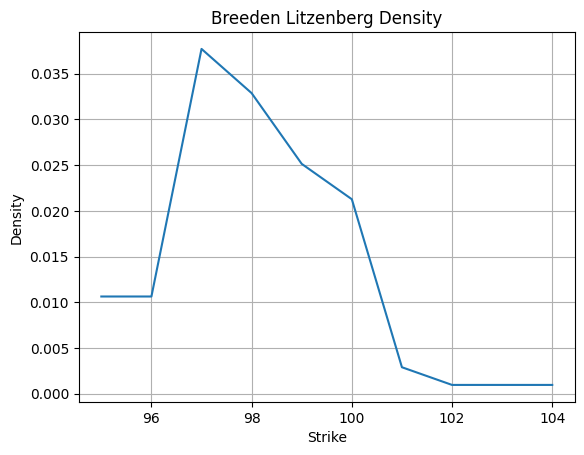

In [7]:
plt.plot(prices1['Strike1'],BL_density)
plt.xlabel('Strike')
plt.ylabel('Density')
plt.title('Breeden Litzenberg Density')
plt.grid('True')

Maintnenant on va utiliser la technique de Shimko pour en calculant la vol implicite

In [8]:
def norm_pdf(x):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x * x)

def black_scholes_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm_pdf(d1)

def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price


def implied_volatility_newton_raphson(S0, K, T, r, market_price, sigma_initial_guess=0.2, max_iterations=100, epsilon=1e-6):
    sigma = sigma_initial_guess
    for i in range(max_iterations):
        price = black_scholes_call_price(S0, K, T, r, sigma)
        vega = black_scholes_vega(S0, K, T, r, sigma)
        
        sigma = sigma - (price - market_price) / vega
        if abs(price - market_price) < epsilon:
            return sigma
        
    return sigma  



In [9]:
volatilities = []
for index, row in prices1.iterrows():
    K = row['Strike1']
    market_price = row['Prix1']
    T = row['Maturité1']
    vol = implied_volatility_newton_raphson(S0, K, T, r, market_price)
    volatilities.append(vol)

prices1['VolImplicite'] = volatilities
print(prices1)

   Strike1  Prix1  Maturité1  VolImplicite
0     95.0  10.93        1.0      0.121141
1     96.0   9.55        1.0      0.096921
2     97.0   8.28        1.0      0.076285
3     98.0   7.40        1.0      0.072562
4     99.0   6.86        1.0      0.080513
5    100.0   6.58        1.0      0.093383
6    101.0   6.52        1.0      0.109328
7    102.0   6.49        1.0      0.123711
8    103.0   6.47        1.0      0.136804
9    104.0   6.46        1.0      0.149040


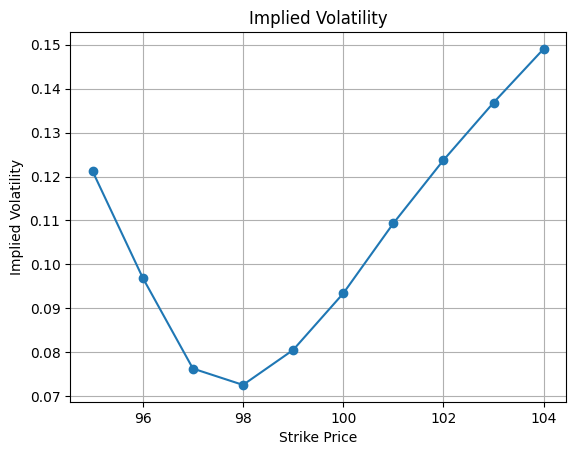

In [10]:
plt.plot(prices1['Strike1'], prices1['VolImplicite'], marker='o')
plt.title('Implied Volatility')
plt.xlabel('Strike Price')
plt.ylabel('Implied Volatility')
plt.grid(True)
plt.show()


In [11]:
def Plus_Strike(start, stop, num):
    if num == 1:
        return [start]
    step = (stop - start) / (num - 1)
    return [start + step*i for i in range(num)]

Strike_pour_densite = Plus_Strike(95, 105, 1000)
print(Strike_pour_densite)  

[95.0, 95.01001001001, 95.02002002002003, 95.03003003003003, 95.04004004004004, 95.05005005005005, 95.06006006006007, 95.07007007007007, 95.08008008008008, 95.09009009009009, 95.10010010010011, 95.11011011011011, 95.12012012012012, 95.13013013013013, 95.14014014014015, 95.15015015015015, 95.16016016016016, 95.17017017017017, 95.18018018018019, 95.1901901901902, 95.2002002002002, 95.2102102102102, 95.22022022022023, 95.23023023023023, 95.24024024024024, 95.25025025025025, 95.26026026026027, 95.27027027027027, 95.28028028028028, 95.29029029029029, 95.30030030030031, 95.31031031031031, 95.32032032032032, 95.33033033033033, 95.34034034034035, 95.35035035035035, 95.36036036036036, 95.37037037037037, 95.38038038038039, 95.3903903903904, 95.4004004004004, 95.4104104104104, 95.42042042042043, 95.43043043043043, 95.44044044044044, 95.45045045045045, 95.46046046046047, 95.47047047047047, 95.48048048048048, 95.49049049049049, 95.50050050050051, 95.51051051051051, 95.52052052052052, 95.53053053053

# Cramer Pour interpolation quadratique

In [12]:

data_points = [
    (95.0, 0.121141),
    (96.0, 0.096921),
    (97.0, 0.076285),
    (98.0, 0.072562),
    (99.0, 0.080513),
    (100.0, 0.093383),
    (101.0, 0.109328),
    (102.0, 0.123711),
    (103.0, 0.136804),
    (104.0, 0.149040)
]

X1, Y1 = data_points[0]
X2, Y2 = data_points[3]
X3, Y3 = data_points[9]

A = [
    [1, X1, X1**2],
    [1, X2, X2**2],
    [1, X3, X3**2]
]
B = [Y1, Y2, Y3]


def determinant(matrix):
    return (matrix[0][0] * (matrix[1][1] * matrix[2][2] - matrix[1][2] * matrix[2][1]) -
            matrix[0][1] * (matrix[1][0] * matrix[2][2] - matrix[1][2] * matrix[2][0]) +
            matrix[0][2] * (matrix[1][0] * matrix[2][1] - matrix[1][1] * matrix[2][0]))

# Cramer
def solve_quadratic_system(A, B):
    det_A = determinant(A)
    if det_A == 0:
        raise ValueError("Pas de solution unique")
    
    A0_matrix = [[B[0], A[0][1], A[0][2]], [B[1], A[1][1], A[1][2]], [B[2], A[2][1], A[2][2]]]
    A1_matrix = [[A[0][0], B[0], A[0][2]], [A[1][0], B[1], A[1][2]], [A[2][0], B[2], A[2][2]]]
    A2_matrix = [[A[0][0], A[0][1], B[0]], [A[1][0], A[1][1], B[1]], [A[2][0], A[2][1], B[2]]]
    
    A0 = determinant(A0_matrix) / det_A
    A1 = determinant(A1_matrix) / det_A
    A2 = determinant(A2_matrix) / det_A
    
    return A0, A1, A2
A0, A1, A2 = solve_quadratic_system(A, B)
print(f"Coeffs: A0={A0}, A1={A1}, A2={A2}")


Coeffs: A0=31.5956085925926, A1=-0.6367809259259265, A2=0.0032154814814814884


In [13]:
def least_squares_fit(x, y, degree=2):
    # Création de la matrice de Vandermonde
    A = [[xi**n for n in range(degree + 1)] for xi in x]
    # Transposition de A
    At = [list(i) for i in zip(*A)]
    AtA = [[sum(At[i][k] * A[k][j] for k in range(len(x))) for j in range(degree + 1)] for i in range(degree + 1)]
    Aty = [sum(y[k] * At[i][k] for k in range(len(x))) for i in range(degree + 1)]
    coef = solve_linear_system(AtA, Aty)
    return coef

def solve_linear_system(A, b):
    n = len(A)
    for i in range(n):
        # Normalisation de la ligne pivot
        pivot = A[i][i]
        for j in range(i, n):
            A[i][j] /= pivot
        b[i] /= pivot
        for k in range(i + 1, n):
            factor = A[k][i]
            for j in range(i, n):
                A[k][j] -= factor * A[i][j]
            b[k] -= factor * b[i]
    x = [0 for _ in range(n)]
    for i in range(n - 1, -1, -1):
        x[i] = b[i] - sum(A[i][j] * x[j] for j in range(i + 1, n))
    return x

x = prices1['Strike1']
y = prices1['VolImplicite']
coefs = least_squares_fit(x, y, 2)
print("Coefficients du polynôme :", coefs)

Coefficients du polynôme : [23.822681830484413, -0.4825218564257689, 0.0024518556510651004]


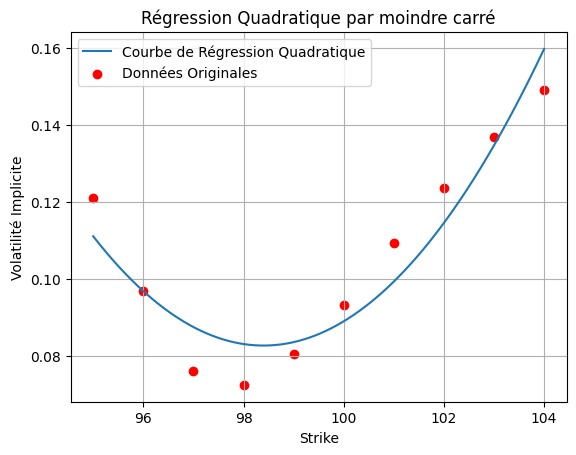

In [14]:
strike_range = np.linspace(min(prices1['Strike1']), max(prices1['Strike1']), 500)
volatility_curve = coefs[0] + coefs[1] * strike_range + coefs[2] * strike_range**2
plt.plot(strike_range, volatility_curve, label='Courbe de Régression Quadratique')
plt.scatter(prices1['Strike1'], prices1['VolImplicite'], color='red', label='Données Originales')


plt.title('Régression Quadratique par moindre carré')
plt.xlabel('Strike')
plt.ylabel('Volatilité Implicite')
plt.legend()
plt.grid(True)
plt.show()

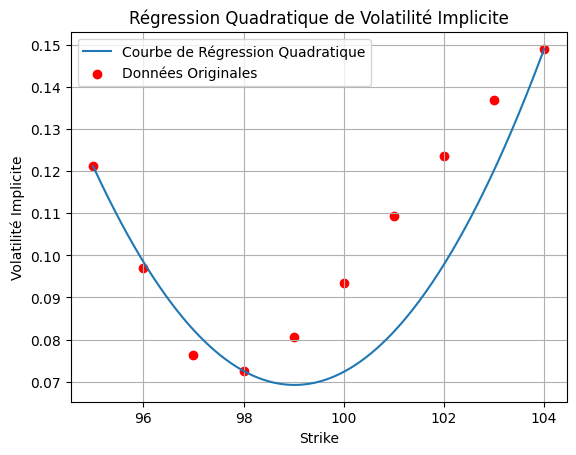

In [15]:
strike_range = np.linspace(min(prices1['Strike1']), max(prices1['Strike1']), 500)
volatility_curve = A0 + A1 * strike_range + A2 * strike_range**2
plt.plot(strike_range, volatility_curve, label='Courbe de Régression Quadratique')
plt.scatter(prices1['Strike1'], prices1['VolImplicite'], color='red', label='Données Originales')


plt.title('Régression Quadratique de Volatilité Implicite')
plt.xlabel('Strike')
plt.ylabel('Volatilité Implicite')
plt.legend()
plt.grid(True)
plt.show()


On voit ici qu'on pourrai faire une interpolation plus précise avec des librairies qui nous permettrai d'avoir des prix estimer avec la vol interpolé plus précis

In [16]:
prices1['VolInterpol'] = prices1.apply(lambda row: A0 + A1 * row['Strike1'] + A2 * row['Strike1']**2, axis=1)
prices1

,Strike1,Prix1,Maturité1,VolImplicite,VolInterpol
0,95.0,10.93,1.0,0.121141,0.121141
1,96.0,9.55,1.0,0.096921,0.098517
2,97.0,8.28,1.0,0.076285,0.082324
3,98.0,7.40,1.0,0.072562,0.072562
4,99.0,6.86,1.0,0.080513,0.069231
5,100.0,6.58,1.0,0.093383,0.072331
6,101.0,6.52,1.0,0.109328,0.081862
7,102.0,6.49,1.0,0.123711,0.097823
8,103.0,6.47,1.0,0.136804,0.120216
9,104.0,6.46,1.0,0.149040,0.149040


In [17]:
prices1['Price_VolInterpol'] = prices1.apply(lambda row: black_scholes_call_price(S0, row['Strike1'], row['Maturité1'], r, row['VolInterpol']), axis=1)
prices1

,Strike1,Prix1,Maturité1,VolImplicite,VolInterpol,Price_VolInterpol
0,95.0,10.93,1.0,0.121141,0.121141,10.930007
1,96.0,9.55,1.0,0.096921,0.098517,9.589450
2,97.0,8.28,1.0,0.076285,0.082324,8.418135
3,98.0,7.40,1.0,0.072562,0.072562,7.400007
4,99.0,6.86,1.0,0.080513,0.069231,6.544037
5,100.0,6.58,1.0,0.093383,0.072331,5.899612
6,101.0,6.52,1.0,0.109328,0.081862,5.539049
7,102.0,6.49,1.0,0.123711,0.097823,5.511816
8,103.0,6.47,1.0,0.136804,0.120216,5.824581
9,104.0,6.46,1.0,0.149040,0.149040,6.459981


Calcul de La Vol interpolé pour chaque Strike (shimko)

In [18]:
def Plus_Strike(start, stop, num):
    if num == 1:
        return [start]
    step = (stop - start) / (num - 1)
    return [start + step*i for i in range(num)]


# Calcul des prix interpolé avec la volatilité interpolé avec les coéfficients quadratique et par la méthode des moindres carré

Quadratique

In [19]:
strikes = Plus_Strike(90, 120, 1000)  
results = pd.DataFrame(strikes, columns=['Strike'])

# Calculer le prix pour chaque strike
results['Volatility_Inter_Quad'] = A0 + A1 * results['Strike'] + A2 * results['Strike']**2
results['Price_Quad'] = results.apply(lambda row: black_scholes_call_price(S0, row['Strike'], T, r, row['Volatility_Inter_Quad']), axis=1)
results['maturité']=1

results['Density_BL_Quad'] = BL_density_Shimko_Quad = breeden_litzenberger_density(results['Price_Quad'],strikes,r,T,results['maturité'])

total_density_B = sum(BL_density_Shimko_Quad)
BL_normalized_density_B = [d / total_density_B for d in BL_density_Shimko_Quad]
BL_normalized_density_B
results['Density_BL_Quad_norm'] = BL_normalized_density_B
results


,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929
1,90.03003,0.328987,20.614903,1,0.019870,0.000929
2,90.06006,0.327254,20.540694,1,0.019892,0.000931
3,90.09009,0.325527,20.466671,1,0.019915,0.000932
4,90.12012,0.323805,20.392833,1,0.019937,0.000933
...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139
996,119.90991,1.472701,50.794244,1,0.002861,0.000134
997,119.93994,1.476738,50.918979,1,0.002745,0.000128
998,119.96997,1.480782,51.043738,1,0.002628,0.000123


 moindre carré

In [20]:
A0b=23.822681830484413
A1b=-0.4825218564257689
A2b= 0.0024518556510651004


results['Volatility_Inter_MC'] = A0b + A1b * results['Strike'] + A2b * results['Strike']**2
results['Price_MC'] = results.apply(lambda row: black_scholes_call_price(S0, row['Strike'], T, r, row['Volatility_Inter_MC']), axis=1)

results['Density_BL_MC'] = BL_density_Shimko_MC = breeden_litzenberger_density(results['Price_MC'],strikes,r,T,results['maturité'])

total_density_MC = sum(BL_density_Shimko_MC)
BL_normalized_density_MC = [d / total_density_MC for d in BL_density_Shimko_MC]
BL_normalized_density_MC
results['Density_BL_MC_norm'] = BL_normalized_density_MC
results

,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm,Volatility_Inter_MC,Price_MC,Density_BL_MC,Density_BL_MC_norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929,0.255746,18.314967,0.014997,0.000862
1,90.03003,0.328987,20.614903,1,0.019870,0.000929,0.254511,18.257837,0.014997,0.000862
2,90.06006,0.327254,20.540694,1,0.019892,0.000931,0.253281,18.200846,0.014999,0.000862
3,90.09009,0.325527,20.466671,1,0.019915,0.000932,0.252055,18.143996,0.015001,0.000862
4,90.12012,0.323805,20.392833,1,0.019937,0.000933,0.250833,18.087286,0.015003,0.000862
...,...,...,...,...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139,1.214092,42.053671,0.008250,0.000474
996,119.90991,1.472701,50.794244,1,0.002861,0.000134,1.217258,42.158360,0.008185,0.000470
997,119.93994,1.476738,50.918979,1,0.002745,0.000128,1.220428,42.263125,0.008119,0.000467
998,119.96997,1.480782,51.043738,1,0.002628,0.000123,1.223602,42.367966,0.008054,0.000463


# Densité Obtenue par BL avec deux méthodes d'interpolation différentes

Text(0, 0.5, 'density')

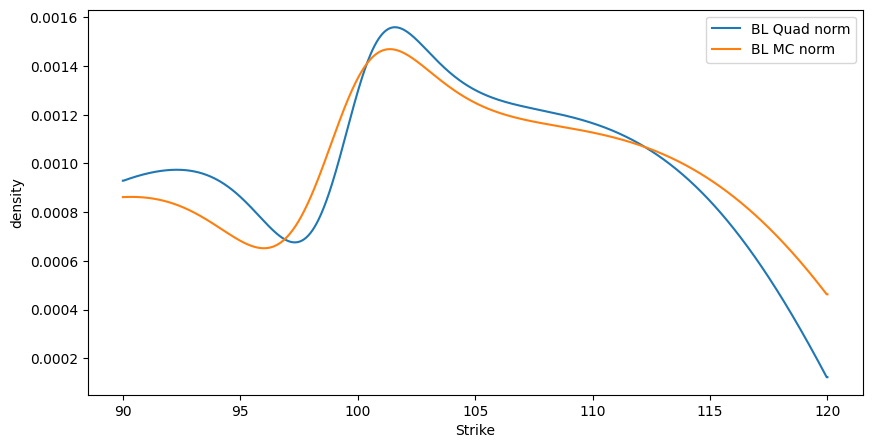

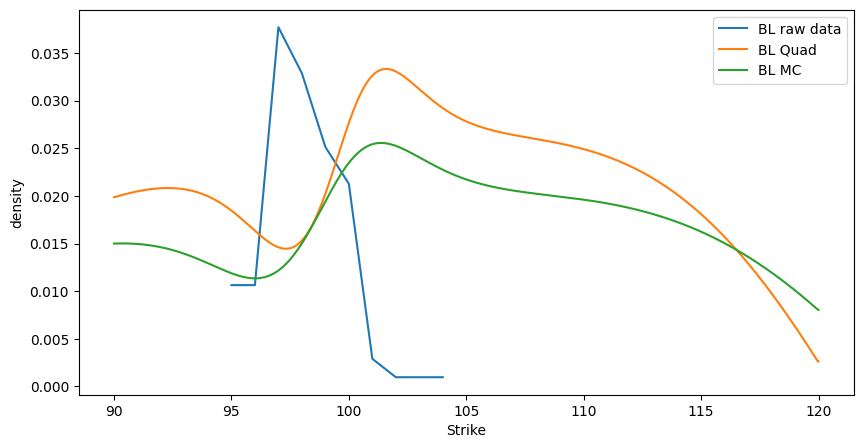

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(results['Strike'],results['Density_BL_Quad_norm'], label='BL Quad norm')
plt.plot(results['Strike'],results['Density_BL_MC_norm'], label = 'BL MC norm')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('density')

plt.figure(figsize=(10, 5))
plt.plot(prices1['Strike1'],BL_density, label='BL raw data')
plt.plot(results['Strike'],results['Density_BL_Quad'], label='BL Quad')
plt.plot(results['Strike'],results['Density_BL_MC'], label = 'BL MC')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('density')

Interpretation paramétrique des densités obtenues avec Breeden Litzenberg

Maintenant en reprenant le papier de David Shimko j'ai voulu implémenter les formules pour bien les comprendre et comparer par rapport a ce que j'obtient avec des interpolations quadratiques

In [22]:
def calculate_d1(S, K, T, r, sigma):
    return (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))

def calculate_d2(d1, sigma, T):
    return d1 - sigma * np.sqrt(T)

def calculate_v(sigma, T):
    return sigma * np.sqrt(T)

def calculate_d1x(v, x,d1,d2,A1,A2):
    return -1/(v *x ) + (1 - d1/v)*(A1 + 2*A2*x)

def calculate_d2x(d1x, A1, A2, x):
    return d1x - (A1 + 2 * A2 * x)

# Calcul de la densité de probabilité f(S=x), équation (A7)
def density_function(d2,d2x,x,A1,A2):
    term1 = norm_pdf(d2)
    term2 = (d2x - (A1 + 2*A2 * x) * (1-d2 * d2x) - 2 * A2 * x)
    density = term1 * term2
    return density

# Calcul de la fonction de distribution cumulative F(S=x), équation (A8)
def cumulative_distribution_function(d2,x,A1,A2):
    cumulative_distribution = 1 + x * norm_pdf(d2) * (A1 + 2 * A2 * x) - norm_pdf(d2)
    return cumulative_distribution


for index, row in results.iterrows():
    d1 = calculate_d1(S0, row['Strike'], T, r, row['Volatility_Inter_MC'])
    d2 = calculate_d2(d1, row['Volatility_Inter_MC'], T)
    v = calculate_v(row['Volatility_Inter_MC'], T)
    x = row['Strike']
    d1x = calculate_d1x(v, x, d1, d2, A1b, A2b)
    d2x = calculate_d2x(d1x, A1b, A2b, x)
    density = density_function(d2, d2x, x, A1b, A2b)
    results.at[index, 'Density'] = density
    cdf = cumulative_distribution_function(d2, x, A1b, A2b)
    results.at[index, 'Cumulative Distribution'] = cdf
print(results)


Density=results['Density']

total_density_dn = sum(Density)
Density_norm = [d / total_density_dn for d in Density]
results['Density_Norm']=Density_norm
results


        Strike  Volatility_Inter_Quad  Price_Quad  maturité  Density_BL_Quad  \
0     90.00000               0.330725   20.689298         1         0.019870   
1     90.03003               0.328987   20.614903         1         0.019870   
2     90.06006               0.327254   20.540694         1         0.019892   
3     90.09009               0.325527   20.466671         1         0.019915   
4     90.12012               0.323805   20.392833         1         0.019937   
..         ...                    ...         ...       ...              ...   
995  119.87988               1.468669   50.669537         1         0.002977   
996  119.90991               1.472701   50.794244         1         0.002861   
997  119.93994               1.476738   50.918979         1         0.002745   
998  119.96997               1.480782   51.043738         1         0.002628   
999  120.00000               1.484831   51.168522         1         0.002628   

     Density_BL_Quad_norm  Volatility_I

,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm,Volatility_Inter_MC,Price_MC,Density_BL_MC,Density_BL_MC_norm,Density,Cumulative Distribution,Density_Norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929,0.255746,18.314967,0.014997,0.000862,-0.116155,-0.673773,0.000564
1,90.03003,0.328987,20.614903,1,0.019870,0.000929,0.254511,18.257837,0.014997,0.000862,-0.116093,-0.667690,0.000563
2,90.06006,0.327254,20.540694,1,0.019892,0.000931,0.253281,18.200846,0.014999,0.000862,-0.116031,-0.661605,0.000563
3,90.09009,0.325527,20.466671,1,0.019915,0.000932,0.252055,18.143996,0.015001,0.000862,-0.115968,-0.655516,0.000563
4,90.12012,0.323805,20.392833,1,0.019937,0.000933,0.250833,18.087286,0.015003,0.000862,-0.115905,-0.649425,0.000563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139,1.214092,42.053671,0.008250,0.000474,-0.228460,4.591862,0.001109
996,119.90991,1.472701,50.794244,1,0.002861,0.000134,1.217258,42.158360,0.008185,0.000470,-0.228321,4.594413,0.001108
997,119.93994,1.476738,50.918979,1,0.002745,0.000128,1.220428,42.263125,0.008119,0.000467,-0.228181,4.596944,0.001107
998,119.96997,1.480782,51.043738,1,0.002628,0.000123,1.223602,42.367966,0.008054,0.000463,-0.228041,4.599453,0.001107


Text(0, 0.5, 'density')

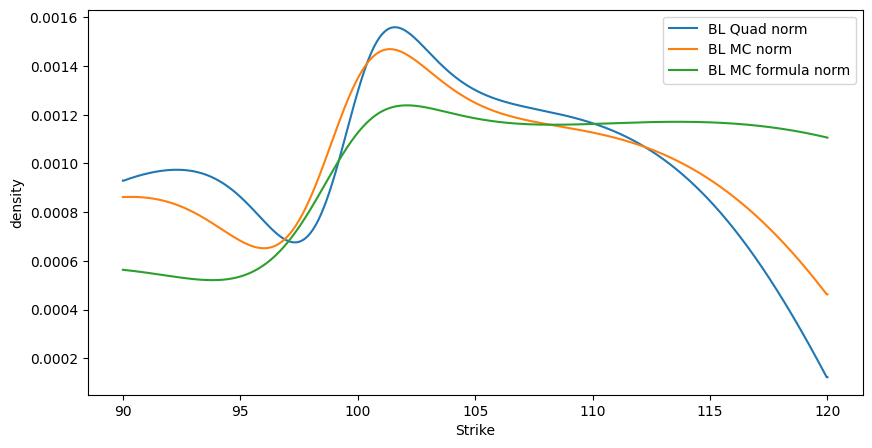

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(results['Strike'],results['Density_BL_Quad_norm'], label='BL Quad norm')
plt.plot(results['Strike'],results['Density_BL_MC_norm'], label = 'BL MC norm')
plt.plot(results['Strike'],results['Density_Norm'], label = 'BL MC formula norm')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('density')


In [24]:
results

,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm,Volatility_Inter_MC,Price_MC,Density_BL_MC,Density_BL_MC_norm,Density,Cumulative Distribution,Density_Norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929,0.255746,18.314967,0.014997,0.000862,-0.116155,-0.673773,0.000564
1,90.03003,0.328987,20.614903,1,0.019870,0.000929,0.254511,18.257837,0.014997,0.000862,-0.116093,-0.667690,0.000563
2,90.06006,0.327254,20.540694,1,0.019892,0.000931,0.253281,18.200846,0.014999,0.000862,-0.116031,-0.661605,0.000563
3,90.09009,0.325527,20.466671,1,0.019915,0.000932,0.252055,18.143996,0.015001,0.000862,-0.115968,-0.655516,0.000563
4,90.12012,0.323805,20.392833,1,0.019937,0.000933,0.250833,18.087286,0.015003,0.000862,-0.115905,-0.649425,0.000563
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139,1.214092,42.053671,0.008250,0.000474,-0.228460,4.591862,0.001109
996,119.90991,1.472701,50.794244,1,0.002861,0.000134,1.217258,42.158360,0.008185,0.000470,-0.228321,4.594413,0.001108
997,119.93994,1.476738,50.918979,1,0.002745,0.000128,1.220428,42.263125,0.008119,0.000467,-0.228181,4.596944,0.001107
998,119.96997,1.480782,51.043738,1,0.002628,0.000123,1.223602,42.367966,0.008054,0.000463,-0.228041,4.599453,0.001107


# Gaussienne sur les données

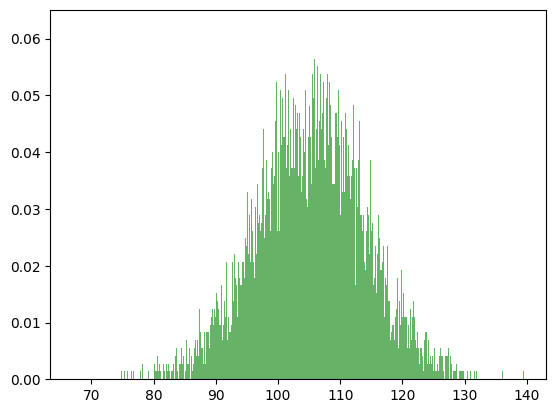

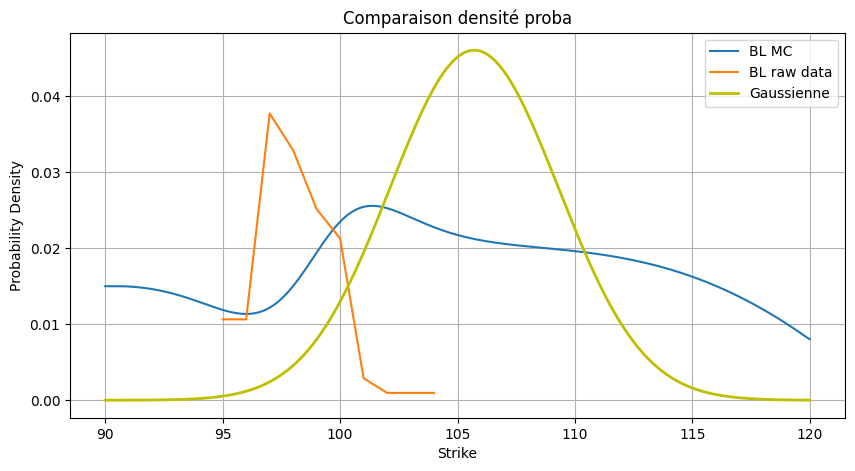

In [25]:

def box_muller(mu, sigma, num_samples=10000):
    samples = []
    for _ in range(num_samples // 2):
        u1, u2 = random.random(), random.random()
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        samples.append(sigma * z0 + mu)
        samples.append(sigma * z1 + mu)
    return samples


summ1 = 0
count = 0
for strike in results['Strike']:
    summ1 += strike
    count += 1
mu = summ1/ count
sum
sum_squared_diffs = 0
for strike in results['Strike']:
    sum_squared_diffs += (strike - mu) ** 2
sigma = (sum_squared_diffs / count) ** 0.5

samples = box_muller(mu, sigma)
count, bins, ignored = plt.hist(samples, bins=999, density=True, alpha=0.6, color='g')
results['Gaussienne']=pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(- (bins - mu)**2 / (2 * sigma**2))

Gauss=results['Gaussienne']

total_density_Gaussn = sum(Gauss)
Gauss_norm = [d / total_density_Gaussn for d in Gauss]
results['Gauss_Norm']=Gauss_norm

plt.figure(figsize=(10, 5))
#plt.plot(results['Strike'],results['Density_BL_Quad_norm'], label='BL Quad norm')
plt.plot(results['Strike'],results['Density_BL_MC'], label = 'BL MC')
plt.plot(prices1['Strike1'],BL_density, label = 'BL raw data')
#plt.plot(results['Strike'],results['Density_Norm'], label = 'BL MC formula norm')
plt.plot( results['Strike'],results['Gaussienne'], linewidth=2, color='y',label = 'Gaussienne')
plt.title('Comparaison densité proba')
plt.xlabel('Strike')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

Il nous faut beaucoup plus fit notre Gaussienne

In [26]:
from math import exp, sqrt, pi

def densite_normale(x, mu, sigma):
    return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x - mu) / sigma) ** 2)

def objectif(params, plage, densite_breeden):
    mu, sigma = params
    densite_gauss = [densite_normale(x, mu, sigma) for x in plage]
    mse = sum((dg - db) ** 2 for dg, db in zip(densite_gauss, densite_breeden)) / len(plage)
    return mse


def nelder_mead2(x1, x2, x3, f,max_iterations):
        
    for i in range(max_iterations):
        
        if f(x1)>f(x2) and f(x3)<f(x2):
            a=x1
            x1=x3
            x3=a   
        if f(x3)<f(x2) and f(x1)<f(x3):
            a=x2
            x2=x3
            x3=a
        if f(x3)<f(x1) and f(x1)<f(x2):
            a=x1
            x1=x2
            x2=x3
            x3=a
        if f(x2)<f(x1) and f(x1)<f(x3):
            a=x1
            x1=x2
            x2=a
        if f(x2)<f(x3) and f(x3)<f(x1):
            a=x1        
            x1=x2    
            x2=x3            
            x3=a

        
        x0=[(x1[0]+x2[0])/2,(x1[1]+x2[1])/2]
        
        xr=[2*x0[0]-x3[0],2*x0[1]-x3[1]]
        
        if f(xr)<f(x1):
            xe=[x0[0]+2*(x0[0]-x3[0]),x0[1]+2*(x0[1]-x3[1])]
            if f(xe)<=f(xr):
                x3=xe
            else:
                x3=xr
        if f(xr)<f(x2):
            x3=xr
        if f(xr)>=f(x2):
            if f(xr)>=f(x2) and f(xr)<f(x3):
                xc=[0.5*(x0[0]+xr[0]),0.5*(x0[1]+xr[1])]
                if f(xc)<f(xr):
                    x3=xc
                else:
                    x2=[0.5*(x1[0]+x2[0]),0.5*(x1[1]+x2[1])]
                    x3=[0.5*(x1[0]+x3[0]),0.5*(x1[1]+x3[1])]
            if f(xr)>=f(x3):
                xc=[0.5*(x0[0]+x3[0]),0.5*(x0[1]+x3[1])]
                if f(xc)<=f(x3):
                    x3=xc
                else:
                    x2=[0.5*(x1[0]+x2[0]),0.5*(x1[1]+x2[1])]
                    x3=[0.5*(x1[0]+x3[0]),0.5*(x1[1]+x3[1])]
        
    return[(x1[0]+x2[0]+x3[0])/3,(x1[1]+x2[1]+x3[1])/3]

x1 = [90, 0.00000001]  
x2 = [102, 10]  
x3 = [110, 50]

plage = results['Strike']
densite_breeden = results['Density_BL_Quad']
resultats = nelder_mead2(x1, x2, x3, lambda params: objectif(params, plage, densite_breeden), max_iterations=1000)

mu_optimal, sigma_optimal = resultats
print("mu optimal:", mu_optimal)
print("sigma optimal:", sigma_optimal)


mu optimal: 102.72747655070766
sigma optimal: 15.092373201443186


In [27]:
results['Gaussienne_fit'] = results['Strike'].apply(lambda x: densite_normale(x, mu_optimal, sigma_optimal))
Gauss_fit=results['Gaussienne_fit']

total_density_Gaussn_fit = sum(Gauss_fit)
Gauss_fit_norm = [d / total_density_Gaussn_fit for d in Gauss_fit]
results['Gauss_fit_Norm']=Gauss_fit_norm
results


,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm,Volatility_Inter_MC,Price_MC,Density_BL_MC,Density_BL_MC_norm,Density,Cumulative Distribution,Density_Norm,Gaussienne,Gauss_Norm,Gaussienne_fit,Gauss_fit_Norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929,0.255746,18.314967,0.014997,0.000862,-0.116155,-0.673773,0.000564,0.000003,2.281431e-07,0.018524,0.000824
1,90.03003,0.328987,20.614903,1,0.019870,0.000929,0.254511,18.257837,0.014997,0.000862,-0.116093,-0.667690,0.000563,0.000003,2.366551e-07,0.018555,0.000826
2,90.06006,0.327254,20.540694,1,0.019892,0.000931,0.253281,18.200846,0.014999,0.000862,-0.116031,-0.661605,0.000563,0.000003,2.454675e-07,0.018586,0.000827
3,90.09009,0.325527,20.466671,1,0.019915,0.000932,0.252055,18.143996,0.015001,0.000862,-0.115968,-0.655516,0.000563,0.000004,2.545901e-07,0.018617,0.000829
4,90.12012,0.323805,20.392833,1,0.019937,0.000933,0.250833,18.087286,0.015003,0.000862,-0.115905,-0.649425,0.000563,0.000004,2.640333e-07,0.018648,0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139,1.214092,42.053671,0.008250,0.000474,-0.228460,4.591862,0.001109,0.000019,1.367894e-06,0.013857,0.000617
996,119.90991,1.472701,50.794244,1,0.002861,0.000134,1.217258,42.158360,0.008185,0.000470,-0.228321,4.594413,0.001108,0.000018,1.323357e-06,0.013826,0.000615
997,119.93994,1.476738,50.918979,1,0.002745,0.000128,1.220428,42.263125,0.008119,0.000467,-0.228181,4.596944,0.001107,0.000018,1.280180e-06,0.013795,0.000614
998,119.96997,1.480782,51.043738,1,0.002628,0.000123,1.223602,42.367966,0.008054,0.000463,-0.228041,4.599453,0.001107,0.000017,1.238325e-06,0.013763,0.000613


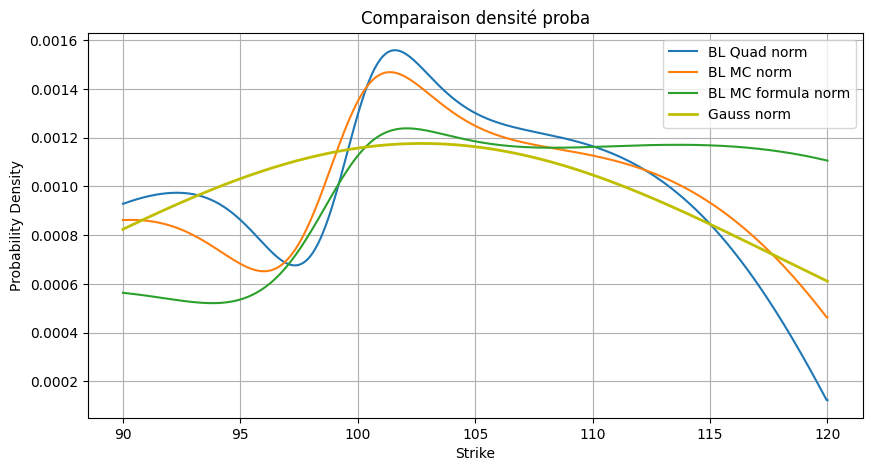

In [28]:
plt.figure(figsize=(10, 5))
plt.plot(results['Strike'],results['Density_BL_Quad_norm'], label='BL Quad norm')
#plt.plot(prices1['Strike1'],BL_density, label='BL Quad norm')
plt.plot(results['Strike'],results['Density_BL_MC_norm'], label = 'BL MC norm')
plt.plot(results['Strike'],results['Density_Norm'], label = 'BL MC formula norm')
plt.plot( results['Strike'],results['Gauss_fit_Norm'], linewidth=2, color='y',label = 'Gauss norm')
plt.title('Comparaison densité proba')
plt.xlabel('Strike')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

# Comparaison

In [29]:
results


,Strike,Volatility_Inter_Quad,Price_Quad,maturité,Density_BL_Quad,Density_BL_Quad_norm,Volatility_Inter_MC,Price_MC,Density_BL_MC,Density_BL_MC_norm,Density,Cumulative Distribution,Density_Norm,Gaussienne,Gauss_Norm,Gaussienne_fit,Gauss_fit_Norm
0,90.00000,0.330725,20.689298,1,0.019870,0.000929,0.255746,18.314967,0.014997,0.000862,-0.116155,-0.673773,0.000564,0.000003,2.281431e-07,0.018524,0.000824
1,90.03003,0.328987,20.614903,1,0.019870,0.000929,0.254511,18.257837,0.014997,0.000862,-0.116093,-0.667690,0.000563,0.000003,2.366551e-07,0.018555,0.000826
2,90.06006,0.327254,20.540694,1,0.019892,0.000931,0.253281,18.200846,0.014999,0.000862,-0.116031,-0.661605,0.000563,0.000003,2.454675e-07,0.018586,0.000827
3,90.09009,0.325527,20.466671,1,0.019915,0.000932,0.252055,18.143996,0.015001,0.000862,-0.115968,-0.655516,0.000563,0.000004,2.545901e-07,0.018617,0.000829
4,90.12012,0.323805,20.392833,1,0.019937,0.000933,0.250833,18.087286,0.015003,0.000862,-0.115905,-0.649425,0.000563,0.000004,2.640333e-07,0.018648,0.000830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,119.87988,1.468669,50.669537,1,0.002977,0.000139,1.214092,42.053671,0.008250,0.000474,-0.228460,4.591862,0.001109,0.000019,1.367894e-06,0.013857,0.000617
996,119.90991,1.472701,50.794244,1,0.002861,0.000134,1.217258,42.158360,0.008185,0.000470,-0.228321,4.594413,0.001108,0.000018,1.323357e-06,0.013826,0.000615
997,119.93994,1.476738,50.918979,1,0.002745,0.000128,1.220428,42.263125,0.008119,0.000467,-0.228181,4.596944,0.001107,0.000018,1.280180e-06,0.013795,0.000614
998,119.96997,1.480782,51.043738,1,0.002628,0.000123,1.223602,42.367966,0.008054,0.000463,-0.228041,4.599453,0.001107,0.000017,1.238325e-06,0.013763,0.000613


In [30]:
distributions = {
    'BL_Quadratic': results['Density_BL_Quad_norm'],
    'BL_MC': results['Density_BL_MC_norm'],
    'BL_Theorical': results['Density_Norm'],
    'Gaussienne_fit' : results['Gauss_fit_Norm'],
}

def calculer_moments(data):
    moyenne = sum(data) / len(data)
    variance = sum((x - moyenne) ** 2 for x in data) / len(data)
    skewness = (sum((x - moyenne) ** 3 for x in data) / len(data)) / (variance ** 1.5)
    kurtosis = ((sum((x - moyenne) ** 4 for x in data) / len(data)) / (variance ** 2)) - 3
    return moyenne, variance, skewness, kurtosis

comparaison = {}
for name, data in distributions.items():
    moments = calculer_moments(data)
    comparaison[name] = moments

df_comparaison = pd.DataFrame.from_dict(comparaison, orient='index', columns=['Moyenne', 'Variance', 'Skewness', 'Kurtosis'])
df_comparaison



,Moyenne,Variance,Skewness,Kurtosis
BL_Quadratic,0.001,1.014361e-07,-0.436022,-0.046206
BL_MC,0.001,6.623500e-08,0.066359,-1.011378
BL_Theorical,0.001,7.034335e-08,-0.980991,-0.862499
Gaussienne_fit,0.001,2.470151e-08,-0.739332,-0.511169


Kolmogorov-Smirnov

In [31]:

def empirical_cdf(sorted_data):
    n = len(sorted_data)
    return [i/n for i in range(1, n+1)]

def ks_test(cdf1, cdf2):
    ks_statistic = max(abs(c1 - c2) for c1, c2 in zip(cdf1, cdf2))
    return ks_statistic

cdf_distributions = {name: empirical_cdf(data) for name, data in distributions.items()}


data = []

for name1, cdf1 in cdf_distributions.items():
    for name2, cdf2 in cdf_distributions.items():
        if name1 != name2:
            ks_statistic = ks_test(cdf1, cdf2)
            data.append({'Distribution1': name1, 'Distribution2': name2, 'KS_Statistic': ks_statistic})


df_comparaison_testKS = pd.DataFrame(data)
df_comparaison_testKS


,Distribution1,Distribution2,KS_Statistic
0,BL_Quadratic,BL_MC,0.0
1,BL_Quadratic,BL_Theorical,0.0
2,BL_Quadratic,Gaussienne_fit,0.0
3,BL_MC,BL_Quadratic,0.0
4,BL_MC,BL_Theorical,0.0
5,BL_MC,Gaussienne_fit,0.0
6,BL_Theorical,BL_Quadratic,0.0
7,BL_Theorical,BL_MC,0.0
8,BL_Theorical,Gaussienne_fit,0.0
9,Gaussienne_fit,BL_Quadratic,0.0


2/ Vérifier, en faisant des tirages dans cette loi implicite, si l’on trouve un prix de modèle proche du
prix de marché pour toutes les options ci-dessus. 


### II – Interpolation et volatilité locale 


3/ Déterminez la nappe de volatilité correspondant à ces 40 options. Proposer un prix, le plus juste
possible, pour une option de strike 99.50 et de maturité 8 mois (justifier la méthode retenue).

In [32]:
prices=pd.read_excel('datatd5.xlsx', usecols='B,C,D')

In [33]:
prices

,Strike,Prix,Maturité
0,95,10.93,1.00
1,96,9.55,1.00
2,97,8.28,1.00
3,98,7.40,1.00
4,99,6.86,1.00
5,100,6.58,1.00
6,101,6.52,1.00
7,102,6.49,1.00
8,103,6.47,1.00
9,104,6.46,1.00


In [34]:
def norm_pdf(x):
    return (1.0 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x * x)

In [35]:
def black_scholes_vega(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S0 * np.sqrt(T) * norm_pdf(d1)

In [36]:
def black_scholes_call_price(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

In [37]:
def implied_volatility_newton_raphson(S0, K, T, r, market_price, sigma_initial_guess=0.2, max_iterations=100, epsilon=1e-6):
    sigma = sigma_initial_guess
    for i in range(max_iterations):
        price = black_scholes_call_price(S0, K, T, r, sigma)
        vega = black_scholes_vega(S0, K, T, r, sigma)
        
        sigma = sigma - (price - market_price) / vega
        if abs(price - market_price) < epsilon:
            return sigma
        
    return sigma

In [38]:
volatility=[]
S0=100
r=0

for i in range(len(prices)):
    volatility.append(implied_volatility_newton_raphson(S0, prices['Strike'][i], prices['Maturité'][i], r, prices['Prix'][i]))

prices['Volatility']=volatility

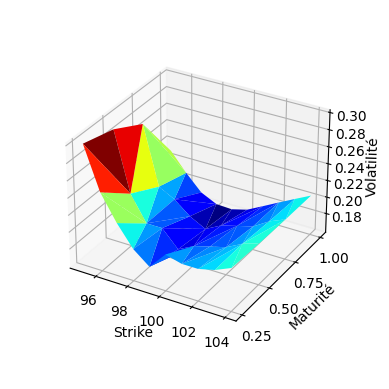

In [39]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_trisurf((prices['Strike']), prices['Maturité'], prices['Volatility'], cmap=cm.jet)
ax.set_xlabel("Strike")
ax.set_ylabel("Maturité")
ax.set_zlabel("Volatilité")
ax.set_yticks([0.25, 0.5, 0.75, 1])
ax.xaxis.set_rotate_label(False) 
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()

In [40]:
def interpolation(vol1, vol2, vol3, vol4):
    inter1=(vol1+vol2)/2 #Volatilité implicite d'une option Strike 99.5 Maturité 9 mois
    inter2=(vol3+vol4)/2 #Volatilité implicite d'une option Strike 99.5 Maturité 6 mois
    interf=(2/3)*inter1+(1/3)*inter2 #Volatilité implicite d'une option Strike 99.5 Maturité 8 mois
    return interf


vol1 = prices[(prices['Strike'] == 99) & (prices['Maturité'] == 0.75)]['Volatility'].values[0]
vol2 = prices[(prices['Strike'] == 100) & (prices['Maturité'] == 0.75)]['Volatility'].values[0]
vol3 = prices[(prices['Strike'] == 99) & (prices['Maturité'] == 0.5)]['Volatility'].values[0]
vol4 = prices[(prices['Strike'] == 100) & (prices['Maturité'] == 0.5)]['Volatility'].values[0]

vol=interpolation(vol1, vol2, vol3, vol4)
print(vol)

S0=100
K=99.5
T=8/12
r=0
print(black_scholes_call_price(S0, K, T, r, vol))

0.17165241489215277
5.826338180166196


4/ Calibrer un modèle à volatilité locale de type SVI en suivant les étapes suivantes :
- écrire l’algorithme de valorisation d’une option avec le modèle SVI, par EDP d’une part et par
Monte Carlo d’autre part et comparer les résultats pour plusieurs jeux de paramètres ;
- estimez les cinq paramètres permettant de réduire au plus l’erreur moyenne ;
- on fixe tous les paramètres aux valeurs estimées ci-avant (sauf a et b) et on va calibrer les deux
paramètres a et b pour chaque option : vous obtiendrez donc une nappe pour chacun de ces
deux paramètres et vous introduirez une contrainte de régularisation de ces deux nappes dans
votre problème d’optimisation. 


In [41]:
K=100
T=1
nb_steps=100
nb_simulations=1000
S0=100

a=0
b=0.35
rho=0
m=0.075
sigma=0.02

In [42]:
def simulations(a, b, sigma, rho, m, K, T, nb_steps, nb_simulations, S0):
    simulations=[]
    np.random.seed(123)
    for j in range(nb_simulations):
        sim=[S0]
        tau=T/nb_steps
        S=S0
        for i in range(nb_steps):
            x=np.log(K/S)
            sigmaimp=np.sqrt(a+b*(rho*(x-m)+np.sqrt((x-m)**2)+sigma**2))
            W=np.random.normal(0,1)
            S=S*np.exp((-(sigmaimp**2)*tau)/2+sigmaimp*(np.sqrt(tau)*W))
            sim.append(S)
        simulations.append(sim)
    return simulations

In [43]:
def Pricing(simulations, K):
    sum=0
    for path in simulations:
        payoff=np.max([0, path[-1]-K])
        sum+=payoff
    return sum/nb_simulations

def StandardError(simulations, K):
    sum=0
    mean=Pricing(simulations, K)
    for path in simulations:
        payoff=np.max([0, path[-1]-K])
        deviation=(payoff-mean)**2
        sum+=deviation
        var=sum/nb_simulations
    return np.sqrt(var/nb_simulations)

In [44]:
df = pd.DataFrame(columns = ['rho', 'a', 'b', 'sigma', 'm', 'Prix', 'StandardError'])
for rho in (0, -0.4, -0.8):   
    for sigma in (0.01, 0.02, 0.03): 
        for b in (0.35, 0.425, 0.5):  
            for m in (0, 0.075, 0.15):  
                for a in (0, 0.05, 0.1):
                    test=simulations(a,b,sigma,rho,m,K,T,nb_steps,nb_simulations,S0)                    
                    new_row = {'rho': rho, 'a': a, 'b' : b, 'sigma' : sigma, 'm' : m, 'Prix' : Pricing(test,K), 'StandardError' : StandardError(test,K)}  
                    if Pricing(test,K)<7 and Pricing(test,K)>6:
                        df.loc[len(df)] = new_row

In [45]:
df = pd.DataFrame(columns = ['rho', 'a', 'b', 'sigma', 'm', 'Prix', 'StandardError'])
rho=0
m=0.075
a=0
for sigma in (0.01, 0.015, 0.02, 0.025, 0.03): 
    for b in (0.35, 0.36, 0.37, 0.38, 0.39, 0.4):                
        test=simulations(a,b,sigma,rho,m,K,T,nb_steps,nb_simulations,S0)                    
        new_row = {'rho': rho, 'a': a, 'b' : b, 'sigma' : sigma, 'm' : m, 'Prix' : Pricing(test,K), 'StandardError' : StandardError(test,K)}  
        if Pricing(test,K)<6.68 and Pricing(test,K)>6.48:
            df.loc[len(df)] = new_row

In [46]:
print(Pricing(simulations(a,b,sigma,rho,m,K,T,nb_steps,nb_simulations,S0),K))
print(StandardError(simulations(a,b,sigma,rho,m,K,T,nb_steps,nb_simulations,S0),K))

6.874805486890004
0.6902652770036997


In [47]:
df

,rho,a,b,sigma,m,Prix,StandardError
0,0,0,0.38,0.010,0.075,6.550086,0.655935
1,0,0,0.39,0.010,0.075,6.630561,0.670836
2,0,0,0.37,0.015,0.075,6.502479,0.641627
3,0,0,0.38,0.015,0.075,6.585144,0.656758
4,0,0,0.39,0.015,0.075,6.665437,0.671664
5,0,0,0.37,0.020,0.075,6.540357,0.642614
6,0,0,0.38,0.020,0.075,6.623887,0.657706
7,0,0,0.36,0.025,0.075,6.494229,0.628658
8,0,0,0.37,0.025,0.075,6.579230,0.643789
9,0,0,0.38,0.025,0.075,6.661782,0.658824


In [48]:
rho=0
sigma=0.025
m=0.075

In [49]:
ksi=1
T=1
steps=100
tau=T/steps

In [50]:
a=0
b=0.4
rho=-0.4
m=0
sigma=0.02
K=100

In [51]:
size=(200,101)
data=np.zeros(size)
for j in range(100,0,-1):
    print(j)
    for i in range(199):
        if j==100:
            data[i][j]=np.max([0,(200-i)*ksi-K])
        else:
            S=(200-i)*ksi
            x=np.log(K/S)
            sigmaimp=np.sqrt(a+b*(rho*(x-m)+np.sqrt((x-m)**2)+sigma**2))
            data[i][j]=data[i][j+1]+tau*(0.5*(sigmaimp**2)*(S**2)*((data[i-1][j+1]-2*data[i][j+1]+data[i+1][j+1])/ksi**2))

100
99
98
97
96
95
94
93
92
91
90
89
88
87
86
85
84
83
82
81
80
79
78
77
76
75
74
73
72
71
70
69
68
67
66
65
64
63
62
61
60
59
58
57
56
55
54
53
52
51
50
49
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1


In [52]:
df2=pd.DataFrame(data)

In [53]:
df2

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.0,-1.899755e+243,6.661822e+240,-2.336091e+238,8.191965e+235,-2.872685e+233,1.007371e+231,-3.532588e+228,1.238792e+226,-4.344163e+223,...,-4.517658e+22,1.746510e+20,-6.873985e+17,2.769246e+15,-1.151118e+13,5.000732e+10,-2.321271e+08,1.202830e+06,-7744.112906,100.0
1,0.0,3.200542e+243,-1.122319e+241,3.935591e+238,-1.380082e+236,4.839510e+233,-1.697068e+231,5.951118e+228,-2.086891e+226,7.318171e+223,...,6.283573e+22,-2.346359e+20,8.828423e+17,-3.348038e+15,1.278238e+13,-4.884608e+10,1.826238e+08,-5.986733e+05,99.000000,99.0
2,0.0,-3.697863e+243,1.296697e+241,-4.547024e+238,1.594471e+236,-5.591223e+233,1.960641e+231,-6.875279e+228,2.410925e+226,-8.454312e+223,...,-5.194744e+22,1.823196e+20,-6.322891e+17,2.144061e+15,-6.951899e+12,2.039375e+10,-4.491724e+07,9.800000e+01,98.000000,98.0
3,0.0,3.510635e+243,-1.231023e+241,4.316651e+238,-1.513658e+236,5.307733e+233,-1.861189e+231,6.526375e+228,-2.288516e+226,8.024834e+223,...,2.999448e+22,-9.564256e+19,2.914273e+17,-8.211749e+14,1.987989e+12,-3.310843e+09,9.700000e+01,9.700000e+01,97.000000,97.0
4,0.0,-2.911024e+243,1.020743e+241,-3.579203e+238,1.255034e+236,-4.400724e+233,1.543093e+231,-5.410768e+228,1.897252e+226,-6.652578e+223,...,-1.251104e+22,3.462004e+19,-8.636744e+16,1.784467e+14,-2.397576e+11,9.600000e+01,9.600000e+01,9.600000e+01,96.000000,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.0,-2.042029e+09,3.382477e+07,-3.854032e+05,2.267879e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
196,0.0,2.070115e+06,-2.370093e+04,1.401894e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
197,0.0,-8.928365e+02,5.310099e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
198,0.0,9.972849e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0


In [54]:
m=0.075
sigma=0.025
rho=0
mu1=0.1
mu2=0.1
nb_steps=100
nb_simulations=100
S0=100

In [55]:
def nelder_mead2(x1, x2, x3, f,max_iterations):
        
    for i in range(max_iterations):
        
        if f(x1)>f(x2) and f(x3)<f(x2):
            a=x1
            x1=x3
            x3=a   
        if f(x3)<f(x2) and f(x1)<f(x3):
            a=x2
            x2=x3
            x3=a
        if f(x3)<f(x1) and f(x1)<f(x2):
            a=x1
            x1=x2
            x2=x3
            x3=a
        if f(x2)<f(x1) and f(x1)<f(x3):
            a=x1
            x1=x2
            x2=a
        if f(x2)<f(x3) and f(x3)<f(x1):
            a=x1        
            x1=x2    
            x2=x3            
            x3=a

        
        x0=[(x1[0]+x2[0])/2,(x1[1]+x2[1])/2]
        
        xr=[2*x0[0]-x3[0],2*x0[1]-x3[1]]
        
        if f(xr)<f(x1):
            xe=[x0[0]+2*(x0[0]-x3[0]),x0[1]+2*(x0[1]-x3[1])]
            if f(xe)<=f(xr):
                x3=xe
            else:
                x3=xr
        if f(xr)<f(x2):
            x3=xr
        if f(xr)>=f(x2):
            if f(xr)>=f(x2) and f(xr)<f(x3):
                xc=[0.5*(x0[0]+xr[0]),0.5*(x0[1]+xr[1])]
                if f(xc)<f(xr):
                    x3=xc
                else:
                    x2=[0.5*(x1[0]+x2[0]),0.5*(x1[1]+x2[1])]
                    x3=[0.5*(x1[0]+x3[0]),0.5*(x1[1]+x3[1])]
            if f(xr)>=f(x3):
                xc=[0.5*(x0[0]+x3[0]),0.5*(x0[1]+x3[1])]
                if f(xc)<=f(x3):
                    x3=xc
                else:
                    x2=[0.5*(x1[0]+x2[0]),0.5*(x1[1]+x2[1])]
                    x3=[0.5*(x1[0]+x3[0]),0.5*(x1[1]+x3[1])]
        
    return[(x1[0]+x2[0]+x3[0])/3,(x1[1]+x2[1]+x3[1])/3]
        

In [56]:
def CMarché(K,T):
    return prices[(prices['Strike'] == K) & (prices['Maturité'] == T)]['Prix'].values[0]

def CModel(K,T,a,b):
    return Pricing(simulations(a,b,sigma,rho,m,K,T,nb_steps,100,S0),K)    


In [57]:
CMarché(100,1)

6.58

In [58]:
CModel(100,1,0,0.37)

8.343226737910882

In [59]:
def target(param):
    K=100
    T=1
    return (CModel(K,T,param[0],param[1])-CMarché(K,T))**2

In [60]:
nelder_mead2([0,0],[0.1,0],[0,0.4],target,100)

C:\Users\paull\AppData\Local\Temp\ipykernel_6260\1049201581.py:10: RuntimeWarning: invalid value encountered in sqrt
  sigmaimp=np.sqrt(a+b*(rho*(x-m)+np.sqrt((x-m)**2)+sigma**2))


[0.03333333333333333, 0.13333333333333333]

6/ On s’intéresse maintenant au modèle PDV (path-dependent volatility), qui est un modèle où la
volatilité dépend des rendements passés (comme un modèle à volatilité stochastique avec une
corrélation entre les deux browniens de -1 ou 1) : 
- écrire l’algorithme de valorisation d’une option avec le modèle PDV, par Monte Carlo (les seuls
rendements considérés seront ceux simulés entre la date courante et la maturité) ;
- estimez les cinq paramètres permettant de réduire au plus l’erreur moyenne ;
- on fixe tous les paramètres aux valeurs estimées ci-avant (sauf 𝛽1 et 𝛽2) et on va calibrer les
deux paramètres 𝛽1 et 𝛽2 pour chaque option : vous obtiendrez donc une nappe pour chacun
de ces deux paramètres et vous introduirez une contrainte de régularisation de ces deux
nappes dans votre problème d’optimisation. 


In [61]:
def simulationsPDV(beta0, beta1, beta2, lambda1, lambda2, K, T, nb_steps, nb_simulations, S0):
    simulations=[]
    np.random.seed(123)
    for j in range(nb_simulations):
        sim=[S0]
        tau=T/nb_steps
        S=S0
        K1=lambda1*np.exp(-lambda1*tau)
        K2=lambda1*np.exp(-lambda2*tau)
        for i in range(nb_steps):
            somme1=0
            somme2=0
            for j in range(0,i-1):
                somme1+=(sim[j+1]/sim[j])*((i-j)/T)*K1
                somme2+=(sim[j+1]/sim[j])**2*((i-j)/T)*K2
            sigmaimp=beta0+beta1*somme1+beta2*np.sqrt(somme2)
            W=np.random.normal(0,1)
            S=S*np.exp((-(sigmaimp**2)*tau)/2+sigmaimp*(np.sqrt(tau)*W))
            sim.append(S)
        simulations.append(sim)
    return simulations

In [62]:
result=simulationsPDV(0.1, 0.01, 0.01, 0.1, 0.1, 100, 1, 100, 1000, 100)

In [63]:
nb_steps=100
nb_simulations=100
K=100
T=1

In [64]:
df = pd.DataFrame(columns = ['beta0', 'beta1', 'beta2', 'lambda1', 'lambda2', 'Prix', 'StandardError'])
for beta0 in (0, 0.01, 0.02):   
    for beta1 in (0, 0.01, 0.02): 
        for beta2 in (0, 0.01, 0.02):  
            for lambda1 in (0, 0.01, 0.02):  
                for lambda2 in (0, 0.01, 0.02):
                    test=simulationsPDV(beta0, beta1, beta2, lambda1, lambda2, K, T, nb_steps, nb_simulations, S0)                    
                    new_row = {'beta0': beta0, 'beta1': beta1, 'beta2' : beta2, 'lambda1' : lambda1, 'lambda2' : lambda2, 'Prix' : Pricing(test,K), 'StandardError' : StandardError(test,K)} 
                    if Pricing(test,K)>5 and Pricing(test,K)<7:
                        df.loc[len(df)] = new_row

In [65]:
df

,beta0,beta1,beta2,lambda1,lambda2,Prix,StandardError
0,0.00,0,0.02,0.02,0.00,6.318138,0.974268
1,0.00,0,0.02,0.02,0.01,6.317810,0.974214
2,0.00,0,0.02,0.02,0.02,6.317483,0.974160
3,0.01,0,0.02,0.02,0.00,6.817688,1.046107
4,0.01,0,0.02,0.02,0.01,6.817359,1.046052
5,0.01,0,0.02,0.02,0.02,6.817030,1.045997
6,0.02,0,0.02,0.01,0.00,5.404718,0.804868
7,0.02,0,0.02,0.01,0.01,5.404489,0.804831
8,0.02,0,0.02,0.01,0.02,5.404261,0.804795


In [66]:
df.to_excel("output.xlsx")  

III – Test d’algorithmes d’optimisation

8/ On veut comparer la performance de trois algorithmes d’optimisation : Nelder-Mead, le recuit
simulé et l’essaim particulaire. Pour simplifier le problème on réduit sa dimension et on se place donc
dans le cadre d’une estimation et non plus d’une calibration. Il s’agit d’estimer le modèle SVI (à cinq
paramètres) qui minimise l’écart quadratique moyen entre prix de marché et prix de modèle pour les
40 options considérées. Trouver le couple de paramètres optimal avec Nelder-Mead puis avec recuit
simulé et enfin avec essaim particulaire. Comparer les résultats obtenus : précision de l’estimation,
rapidité de la convergence, stabilité de la solution. 